In [1]:
#NLTK AND SPACY
import string,re,nltk
from string import punctuation
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
import spacy
!pip install contractions
import contractions

/Users/shubhsudan/Downloads/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
nltk.download('all')
!python -m spacy download en_core_web_sm

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/shubhsudan/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/shubhsudan/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/shubhsudan/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/shubhsudan/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /Users/shubhsudan/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    |

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 4.8 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [3]:
#USING TENSORFLOW LIBRARIES

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
#Optimization Technique
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.utils import to_categorical

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [6]:
df = pd.read_csv("/Users/shubhsudan/Downloads/IMDB Dataset.csv")

In [7]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [8]:
df.shape

(50000, 2)

In [9]:
df.isnull()

,review,sentiment
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
49995,False,False
49996,False,False
49997,False,False
49998,False,False


In [10]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [11]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [12]:
#Complete Data available
#so no need to drop columns/rows

In [13]:
#We start to slowly slowly refine our dataset in the text column

In [14]:
#Now we start to clean our text data
#Regular Expressions
regexp = RegexpTokenizer("[\w']+")

In [15]:
def convert_abbrev(text):
    words = []
    for words in regexp.tokenize(text):
        if word in abbrev_words:
            words = words + abbrev_dict[word].split()
        else:
            words = words + word.split()
    text_converted = " ".join(words)
    
    return text_converted

In [16]:
#LOWERCASING THE TEXT
def text_lower(text):
    text = text.lower()
    return text

In [17]:
#REMOVING WHITESPACE FROM THE TEXT

In [18]:
def remove_whitespace(text):
    text = text.strip()
    return text

In [19]:
#Remove Punctuation(?,!)
def remove_punctuation(text):
    punct = string.punctuation
    punct = punct.replace("''","")
    text = text.translate(str.maketrans("", "".punct))
    return text

In [20]:
#Remove html
def remove_html(text):
    html = re.compile(r'<.*?>')
    text = html.sub(r'',text)
    return text

In [21]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [22]:
#WE DONT HAVE EMOJIS IN OUR DATA

In [23]:
#but we do have abbreviated words I'm and etc

In [24]:
'''ABR=ABREVIATED REVIEW
S=SENTIMENT'''
abbrev = pd.read_csv("/Users/shubhsudan/Downloads/IMDB Dataset.csv",names = ['ABR','S'])

In [25]:
abbrev

,ABR,S
0,review,sentiment
1,One of the other reviewers has mentioned that ...,positive
2,A wonderful little production. <br /><br />The...,positive
3,I thought this was a wonderful way to spend ti...,positive
4,Basically there's a family where a little boy ...,negative
...,...,...
49996,I thought this movie did a down right good job...,positive
49997,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49998,I am a Catholic taught in parochial elementary...,negative
49999,I'm going to have to disagree with the previou...,negative


In [26]:
abbrev_lower = pd.DataFrame()
abbrev_lower['ABR'] = abbrev['ABR'].apply(text_lower)
abbrev_lower['S'] = abbrev['S'].apply(text_lower)
abbrev_dict = dict(zip(list(abbrev_lower.ABR), list(abbrev_lower.S)))
abbrev_words = list(abbrev_dict.keys())

In [27]:
def convert_abbrev(text):
    words = []
    for words in regexp.tokenize(text):
        if word in abbrev_words:
            words = words + abbrev_dict[word].split()
        else:
            words = words + word.split()
    text_converted = " ".join(words)
    
    return text_converted

In [28]:
#Convert Contractions like you're

def convert_contractions(text):
    text = contractions.fix(text)
    return text

In [29]:
#Remove stopwords
def remove_stopwords(text):
    text = " ".join([word for word in nltk.tokenize.word_tokenize(text) if word not in stopwords.words('english')])
    return text

In [30]:
#Lemmatization
nlp = spacy.load("en_core_web_sm",disable=['parser','ner'])

def lemmatize(text):
    text = " ".join([token.lemma_ for token in nlp(text)])
    return text

In [31]:
#Remove Non-Alphabetic Characters
def discard_non_alpha(text):
    word_list_non_alpha = [word for word in regexp.tokenize(text) if word.isalpha()]
    text = " ".join(word_list_non_alpha) 
    return text

In [32]:
#Aggregating All definitions
def text_clean(text):
    text = text_lower(text)
    text = remove_whitespace(text) 
    text = re.sub('\n' , '', text) 
    text = re.sub('\[.*?\]', '', text)
    text = remove_stopwords(text)
    text = discard_non_alpha(text)
    text = lemmatize(text)
    
    return text


In [33]:
# Apply on Dataset
df['review_clean'] = df['review'].apply(text_clean)
df.head()

,review,sentiment,review_clean
0,One of the other reviewers has mentioned that ...,positive,one reviewer mention watch oz episode hook rig...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production br br film techniq...
2,I thought this was a wonderful way to spend ti...,positive,think wonderful way spend time hot summer week...
3,Basically there's a family where a little boy ...,negative,basically family little boy jake think zombie ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visually stunnin...


In [34]:
le = LabelEncoder()
df['Encoded_Labels'] = le.fit_transform(df['sentiment'])
#label = data['Encoded_Labels'].unique()
inv_labels = le.inverse_transform([0,1])
label_len = len(le.classes_)
df.head()

,review,sentiment,review_clean,Encoded_Labels
0,One of the other reviewers has mentioned that ...,positive,one reviewer mention watch oz episode hook rig...,1
1,A wonderful little production. <br /><br />The...,positive,wonderful little production br br film techniq...,1
2,I thought this was a wonderful way to spend ti...,positive,think wonderful way spend time hot summer week...,1
3,Basically there's a family where a little boy ...,negative,basically family little boy jake think zombie ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visually stunnin...,1


In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    df.review_clean,
    df.Encoded_Labels,
    stratify=df.Encoded_Labels,
    random_state=2)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train,dtype=np.float32)
y_test = np.array(y_test,dtype=np.float32)

In [36]:
batch_size = 4
max_words = 10000
max_len = 50
embedding_dim = 50
lstm_units = 32

In [37]:
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
seqs = tok.texts_to_sequences(X_train)
test_seqs = tok.texts_to_sequences(X_test)
seq_matrix = sequence.pad_sequences(seqs,max_len)
test_seq_matrix = sequence.pad_sequences(test_seqs,max_len)

In [38]:
seq_matrix[0]

array([  88,  127,  537, 4376,  560,   80,   30,  388,   53,  898,    3,
        415,  360,    1,    1, 7422, 5809,    8,  108, 1246, 2852, 1247,
       9000,  917, 1316,    8,   24,  217,   85,  674,  924,    1,    1,
        247,    2,   56,    8, 1354,   89, 1630,  179, 1231, 1881, 1165,
       1756,   75, 5809,  118,  338,   25], dtype=int32)

In [39]:
def LSTM_Model(words,len,dim,units,num_labels):
    model = tf.keras.Sequential()
    model.add(Embedding(input_dim=words, output_dim=dim, input_length=len)) 
    model.add(LSTM(units=units, dropout=0.2, recurrent_dropout=0.2)) 
    model.add(Dense(num_labels, activation='softmax'))
    model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    return model

In [40]:
model = LSTM_Model(max_words,max_len,embedding_dim,lstm_units,label_len)

In [41]:
#1ST LAYER
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 50)            500000    
                                                                 
 lstm (LSTM)                 (None, 32)                10624     
                                                                 
 dense (Dense)               (None, 2)                 66        
                                                                 
Total params: 510690 (1.95 MB)
Trainable params: 510690 (1.95 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
model.fit(seq_matrix,y_train,epochs=3,batch_size=batch_size,validation_split=0.2)

Epoch 1/3
7500/7500 [==============================] - 86s 11ms/step - loss: 0.3975 - accuracy: 0.8224 - val_loss: 0.3477 - val_accuracy: 0.8477
Epoch 2/3
7500/7500 [==============================] - 86s 11ms/step - loss: 0.2755 - accuracy: 0.8866 - val_loss: 0.3570 - val_accuracy: 0.8509
Epoch 3/3
7500/7500 [==============================] - 86s 11ms/step - loss: 0.2040 - accuracy: 0.9194 - val_loss: 0.3823 - val_accuracy: 0.8373


In [43]:
prediction = model.predict(test_seq_matrix)

391/391 [==============================] - 1s 2ms/step


In [44]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,np.argmax(prediction,axis=1),
                            target_names=inv_labels))

              precision    recall  f1-score   support

    negative       0.82      0.85      0.84      6250
    positive       0.84      0.82      0.83      6250

    accuracy                           0.83     12500
   macro avg       0.83      0.83      0.83     12500
weighted avg       0.83      0.83      0.83     12500



<Axes: >

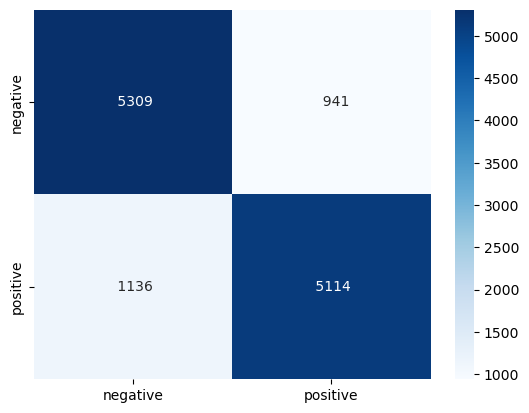

In [45]:
sns.heatmap(confusion_matrix(y_test,np.argmax(prediction,axis=1)),annot=True,
            fmt='5',cmap='Blues',xticklabels=inv_labels, 
            yticklabels=inv_labels)

In [46]:
#2nd layer for 2nd set of results

In [86]:
X_train, X_test, y_train, y_test = train_test_split(
    df.review_clean,
    df.Encoded_Labels,
    stratify=df.Encoded_Labels,
    random_state=2)

X_train = np.array(X_train)
X_test = np.array(X_test)

# Convert the labels to one-hot encoded vectors
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)

In [87]:
batch_size = 8
max_words = 250000
max_len = 30
embedding_dim = 30
lstm_units = 32

In [88]:
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
seqs = tok.texts_to_sequences(X_train)
test_seqs = tok.texts_to_sequences(X_test)
seq_matrix = sequence.pad_sequences(seqs,max_len)
test_seq_matrix = sequence.pad_sequences(test_seqs,max_len)

In [89]:
seq_matrix[0]

array([ 9000, 36384,   917, 45809,  1316,     8,    24,   217,    85,
         674,   924,     1,     1,   247,     2,    56,     8,  1354,
          89,  1630,   179,  1231,  1881,  1165,  1756,    75,  5809,
         118,   338,    25], dtype=int32)

In [90]:
def LSTM_Model(words,len,dim,units,labels):
    model = tf.keras.Sequential()
    model.add(Embedding(input_dim=words, output_dim=dim, input_length=len)) 
    model.add(LSTM(units=units, return_sequences=True)) 
    model.add(LSTM(units=units, activation = 'tanh')) 
    model.add(Dense(labels, activation='softmax'))

    model.compile(optimizer='adam',
                loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [91]:
model = LSTM_Model(max_words,max_len,embedding_dim,lstm_units,label_len)

In [92]:
#2 LAYERS
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 30, 30)            7500000   
                                                                 
 lstm_21 (LSTM)              (None, 30, 32)            8064      
                                                                 
 lstm_22 (LSTM)              (None, 32)                8320      
                                                                 
 dense_11 (Dense)            (None, 2)                 66        
                                                                 
Total params: 7516450 (28.67 MB)
Trainable params: 7516450 (28.67 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [93]:
model.fit(seq_matrix,y_train,epochs=3,batch_size=batch_size,validation_split=0.2)

Epoch 1/3
3750/3750 [==============================] - 58s 15ms/step - loss: 0.4422 - accuracy: 0.7907 - val_loss: 0.3960 - val_accuracy: 0.8161
Epoch 2/3
3750/3750 [==============================] - 57s 15ms/step - loss: 0.2753 - accuracy: 0.8858 - val_loss: 0.4349 - val_accuracy: 0.8105
Epoch 3/3
3750/3750 [==============================] - 58s 15ms/step - loss: 0.1660 - accuracy: 0.9341 - val_loss: 0.5209 - val_accuracy: 0.7969


In [94]:
prediction = model.predict(test_seq_matrix)

391/391 [==============================] - 1s 2ms/step


In [96]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Extract the first dimension of the labels
y_test_1d = np.argmax(y_test, axis=1)

# Print the classification report
print(classification_report(y_test_1d, np.argmax(prediction, axis=1), target_names=inv_labels))

              precision    recall  f1-score   support

    negative       0.83      0.72      0.77      6250
    positive       0.75      0.85      0.80      6250

    accuracy                           0.79     12500
   macro avg       0.79      0.79      0.79     12500
weighted avg       0.79      0.79      0.79     12500



<Axes: >

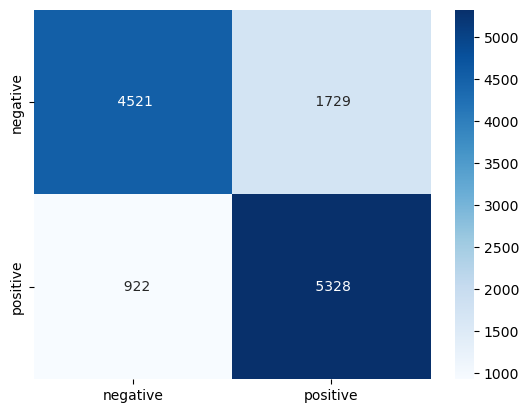

In [97]:
sns.heatmap(confusion_matrix(y_test_1d,np.argmax(prediction,axis=1)),annot=True,
            fmt='5',cmap='Blues',xticklabels=inv_labels, 
            yticklabels=inv_labels)